# Business Problem
1.An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.


# Business Objective
The objective is to develop a Multiple Linear Regression (MLR) model to predict a startup’s profit based on factors like R&D Spend, Marketing Spend, Administration Cost, and State. The model aims to identify key profitability drivers, helping businesses make informed decisions.



# Business Constarints
1. Data Quality: Handle missing values and properly encode categorical variables like 'State'.
2. Multicollinearity: Avoid highly correlated variables that may affect reliability.
3. Linear Regression Assumptions: Ensure linearity, homoscedasticity, independence, and normality of residuals.
4. Feature Selection: Remove insignificant variables to improve accuracy.
5. Overfitting: Prevent excessive features to ensure generalization.
6. Business Constraints: Ensure interpretability for effective decision-making.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data=pd.read_csv("Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Understanding

In [3]:
data.shape

(50, 5)

In [4]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


1. R&D Spend, Administration, Marketing Spend (Numerical)
2. State (Categorical)
3. Profit (Target variable, Numerical)

In [7]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

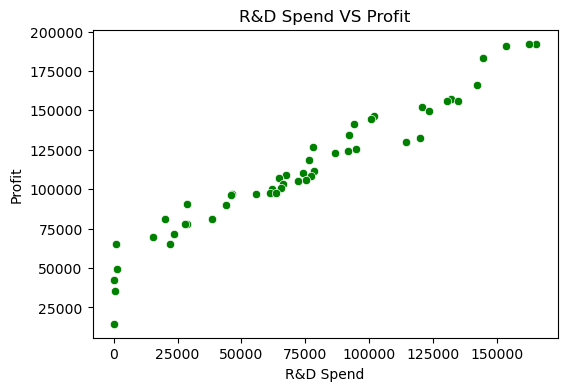

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['R&D Spend'],y=data['Profit'],color='green')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D Spend VS Profit")
plt.show()

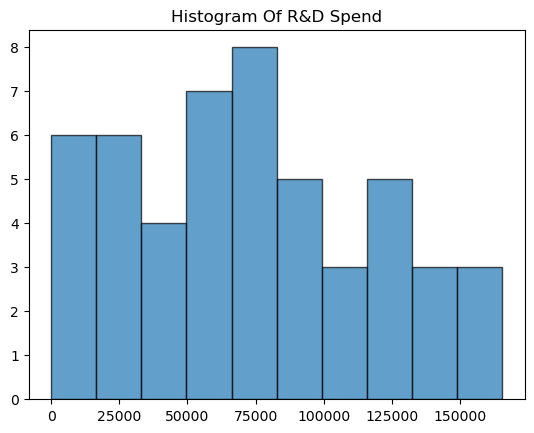

In [9]:
plt.hist(data['R&D Spend'],bins=10,edgecolor='k',alpha=0.7)
plt.title('Histogram Of R&D Spend')
plt.show()

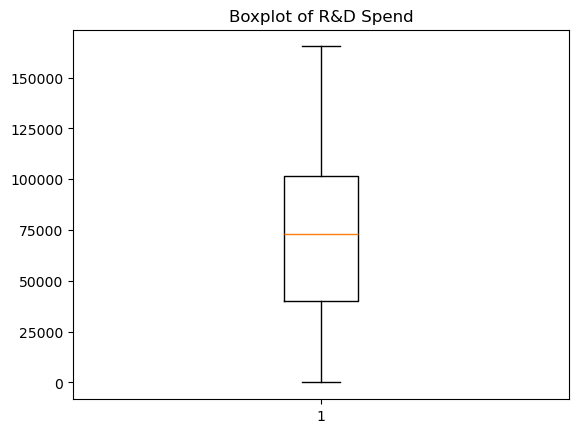

In [10]:
plt.boxplot(data['R&D Spend'])
plt.title('Boxplot of R&D Spend')
plt.show()

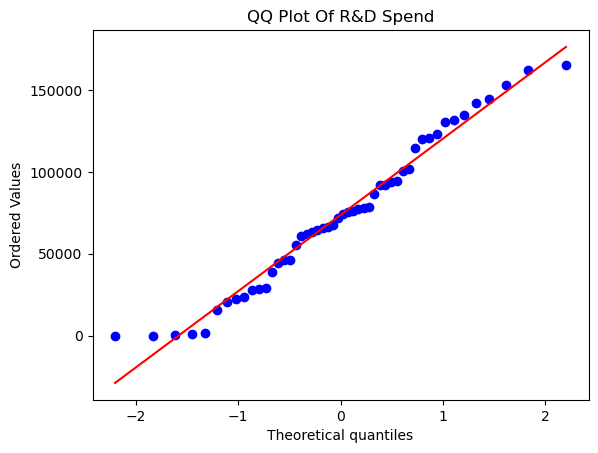

In [12]:
#QQ plot for R&D Spend
stats.probplot(data['R&D Spend'],dist='norm',plot=plt)
plt.title('QQ Plot Of R&D Spend')
plt.show()

In [13]:
data.select_dtypes(include=['number']).corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [14]:
data=pd.get_dummies(data,columns=['State'],drop_first=True)


In [15]:
ml1 = smf.ols(formula='Profit ~ Q("R&D Spend") + Administration + Q("Marketing Spend")', data=data).fit()
# Display summary
print(ml1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           4.53e-30
Time:                        10:51:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.012e+04 

In [19]:

# Define features and target variable
X = data.drop(columns=['Profit'])
y = data['Profit']


In [20]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#

In [21]:
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(6961.477813252382, 82010363.04430102, 9055.957323458466, 0.8987266414328637)

In [27]:
# Remove less significant features (State and Administration) and retrain the model
X_refined = data[['R&D Spend', 'Marketing Spend']]
y_refined = data['Profit']


In [29]:
# Split into training and testing sets
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(
    X_refined, y_refined, test_size=0.2, random_state=42
)

In [31]:
# Train the refined model
model_refined = LinearRegression()
model_refined.fit(X_train_refined, y_train_refined)


LinearRegression()

In [32]:
# Predictions
y_pred_refined = model_refined.predict(X_test_refined)


In [33]:
# Evaluate the refined model
mae_refined = mean_absolute_error(y_test_refined, y_pred_refined)
mse_refined = mean_squared_error(y_test_refined, y_pred_refined)
rmse_refined = np.sqrt(mse_refined)
r2_refined = r2_score(y_test_refined, y_pred_refined)


In [34]:
mae_refined, mse_refined, rmse_refined, r2_refined

(6469.181721468586, 67343832.58979604, 8206.32881316585, 0.9168381183550247)